In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.utils_figures import tendency_to_col_dict

In [2]:
#metric, metricnameinunivariate = 'f1_score', 'f1_avg'
#metric, metricnameinunivariate = 'accuracy', 'accuracy_avg'
metric, metricnameinunivariate = 'balancedaccuracy', 'balancedaccuracy_avg'
#metric, metricnameinunivariate = 'mcc', 'mccscore_avg'

# import meta df
meta_df = pd.read_csv(f'meta_df_{metric}.csv', index_col=0)
meta_df = meta_df[meta_df['tendency'] != '?']

In [3]:
meta_df['tendency'].value_counts()

tendency
multivariate models performs better than univariate models    372
multivariate and univariate models are equivalent             270
univariate models performs better than multivariate models    177
no models performs better than the baseline                    13
Name: count, dtype: int64

number of datasets 832
max_dim 20000
min_dim 5


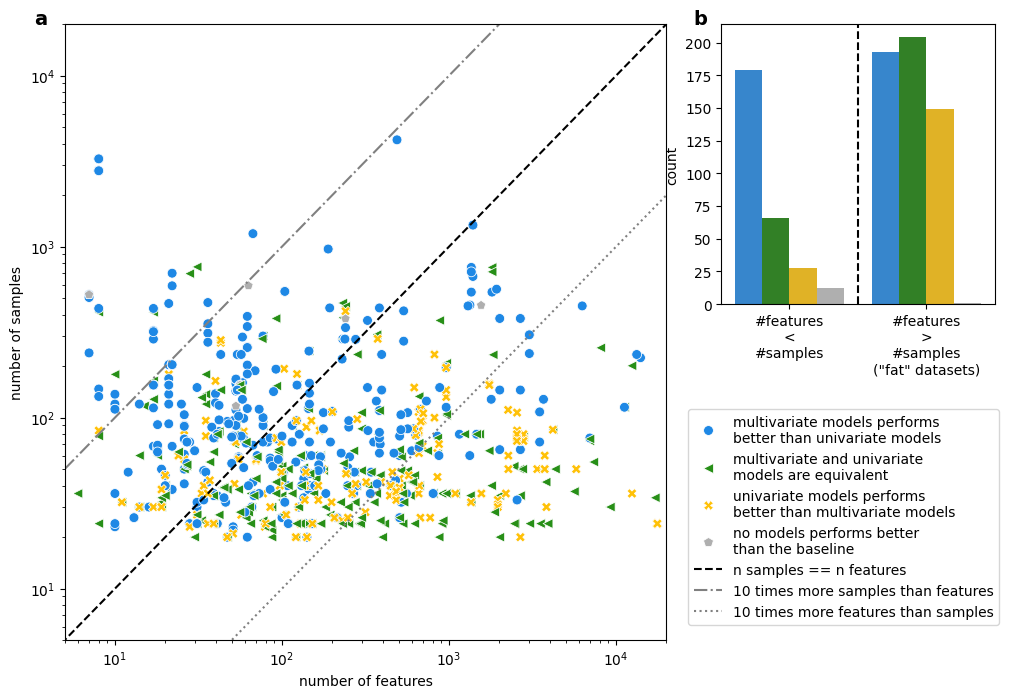

In [4]:
diff_df = meta_df.copy()
diff_df['dataset'] = diff_df.index
# reindex
diff_df['rank'] = range(len(diff_df))

hue_order = [k for k in tendency_to_col_dict.keys() if k in diff_df['tendency'].value_counts().index]

print('number of datasets', len(diff_df))

import matplotlib.gridspec as gridspec
# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(gs[0:2, 0:2]) # row 0, col 0
ax2 = fig.add_subplot(gs[0, 2]) # row 0, col 1

max_dim = 20000
min_dim = 5
#max_dim = max(diff_df['n features'].max(), diff_df['n samples'].max())
#min_dim = min(diff_df['n features'].min(), diff_df['n samples'].min())
print('max_dim', max_dim)
print('min_dim', min_dim)
#min_dim -= 1
#max_dim += 250
ax1.plot([0, max_dim], [0, max_dim], ls='--', color='black', label='n samples == n features')
ax1.plot([min_dim, max_dim/10], [min_dim*10, max_dim], ls='dashdot', color='grey', label='10 times more samples than features')
ax1.plot([min_dim, max_dim*10], [min_dim/10, max_dim], ls='dotted', color='grey', label='10 times more features than samples')
#sns.scatterplot(data=diff_df, x='n features', y='n samples', hue='tendency', palette=tendency_to_col_dict, size='absolute difference |ML - univariate|', sizes=(50, 200))
# define markers for tendency
tendency_to_marker = {list(tendency_to_col_dict)[0]: 'o',
                      list(tendency_to_col_dict)[1]: '<',
                      list(tendency_to_col_dict)[2]: 'X',
                      list(tendency_to_col_dict)[3]: 'p'}
markers_list = [tendency_to_marker[t] for t in diff_df['tendency']]
sns.scatterplot(data=diff_df, x='n features', y='n samples', hue='tendency', hue_order=hue_order, palette=tendency_to_col_dict, s=50, style='tendency', markers=tendency_to_marker, ax=ax1)
# diagonal
# text on the diagonal
#plt.text(370, 420, 'n samples = n features', color='black', rotation=45)
# log scale
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(min_dim, max_dim)
ax1.set_ylim(min_dim, max_dim)
ax1.set_xlabel('number of features')
ax1.set_ylabel('number of samples')
# legend outside ax1
# get legend handles and labels
handles, labels = ax1.get_legend_handles_labels()
# put the first 3 labels at the end
handles = handles[3:] + handles[:3]
labels = labels[3:] + labels[:3]
labels[0] = labels[0].replace('performs ', 'performs\n')
labels[1] = labels[1].replace('univariate ', 'univariate\n')
labels[2] = labels[2].replace('performs ', 'performs\n')
labels[3] = labels[3].replace('better ', 'better\n')


# add a blank separator
# create the legend
ax1.legend(handles, labels, loc='center left', bbox_to_anchor=(1.025, 0.2))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.text(-0.05, 1.0, 'a', transform=ax1.transAxes, size=14, weight='bold')


# groupy by tendency and is fat
grouped = diff_df.groupby(['tendency', 'is fat']).size().reset_index(name='count')
#sns.barplot(data=grouped, y='tendency', x='count', hue='is fat', palette={True: 'red', False: 'blue'})
sns.barplot(data=grouped, x='is fat', y='count', hue='tendency', hue_order=hue_order, palette=tendency_to_col_dict, ax=ax2)
# vertical line at 0.5
ax2.axvline(0.5, color='black', ls='--')
# legend outside
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# replace y ticks
ax2.set_xticks([0, 1], ['#features\n<\n#samples', '#features\n>\n#samples\n("fat" datasets)'])
# remove axis label
ax2.set_xlabel('')
# remove legend
ax2.get_legend().remove()
ax2.text(-0.1, 1.0, 'b', transform=ax2.transAxes, size=14, weight='bold')

plt.savefig('figures/figure3_dimension_and_best_model.pdf', bbox_inches='tight')

plt.show()



In [5]:
text = ''
text += 'Dimensions and tendency. 3a: Each point represents a dataset. '
text += 'The x-axis is the number of features and the y-axis is the number of samples. '
text += 'The points are colored according to the tendency of the dataset. '
text += 'The dashed line represents the case where the number of samples is equal to the number of features. '
text += 'The dash-dotted line represents the case where the number of samples is 10 times greater than the number of features. '
text += 'The dotted line represents the case where the number of features is 10 times greater than the number of samples. '
text += 'The points are plotted on a log-log scale. '
text += '3b: Number of datasets for each tendency given the dataset is "fat" or not.'

print(text)

Dimensions and tendency. 3a: Each point represents a dataset. The x-axis is the number of features and the y-axis is the number of samples. The points are colored according to the tendency of the dataset. The dashed line represents the case where the number of samples is equal to the number of features. The dash-dotted line represents the case where the number of samples is 10 times greater than the number of features. The dotted line represents the case where the number of features is 10 times greater than the number of samples. The points are plotted on a log-log scale. 3b: Number of datasets for each tendency given the dataset is "fat" or not.


In [6]:
text = ''
text += 'Figure \\ref{fig:dimension_and_tendency} shows the datasets given their dimensions in number of samples and features. '
text += ' A dataset where the number of features is bigger than the number of samples is sometimes qualified as "fat data" in the literature. '
text += 'This opposes to the more common case of "big data". '
text += 'A first result is that there is more dataset that are fat than not fat. '
n_total = len(diff_df)
n_fat = len(diff_df[diff_df["is fat"]])
n_not_fat = n_total - n_fat
percent_fat = int(len(diff_df[diff_df["is fat"]]) / n_total * 100)
text += f'Out of the {n_total} datasets, {n_fat} ({percent_fat}\%) have more features than samples. '

print(text)

Figure \ref{fig:dimension_and_tendency} shows the datasets given their dimensions in number of samples and features.  A dataset where the number of features is bigger than the number of samples is sometimes qualified as "fat data" in the literature. This opposes to the more common case of "big data". A first result is that there is more dataset that are fat than not fat. Out of the 832 datasets, 547 (65\%) have more features than samples. 


In [7]:
diff_df['tendency'].value_counts()

tendency
multivariate models performs better than univariate models    372
multivariate and univariate models are equivalent             270
univariate models performs better than multivariate models    177
no models performs better than the baseline                    13
Name: count, dtype: int64

In [13]:
blue_tendency_name = 'multivariate models performs better than univariate models'
orange_tendency_name = 'univariate models performs better than multivariate models'
rest_tendencies_names = ['multivariate and univariate models are equivalent', 'no models performs better than the baseline']
print('The main result from Figure \\ref{fig:dimension_and_best_model} is that there is an association between the dataset dimension and the univariate being better than multivariate models. ')
blue_percentage_nonfat = round(len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"] == blue_tendency_name)]) / n_not_fat * 100)
blue_occurences_nonfat = len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"] == blue_tendency_name)])
orange_percentage_nonfat = round(len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"] == orange_tendency_name)]) / n_not_fat * 100)
orange_occurences_nonfat = len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"] == orange_tendency_name)])
rest_percentage_nonfat = round(len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"].isin(rest_tendencies_names))]) / n_not_fat * 100)
rest_occurences_nonfat = len(diff_df[(diff_df["is fat"] == False) & (diff_df["tendency"].isin(rest_tendencies_names))])
blue_percentage_fat = round(len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"] == blue_tendency_name)]) / n_fat * 100)
blue_occurence_fat = len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"] == blue_tendency_name)])
orange_percentage_fat = round(len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"] == orange_tendency_name)]) / n_fat * 100)
orange_occurence_fat = len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"] == orange_tendency_name)])
rest_percentage_fat = round(len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"].isin(rest_tendencies_names))]) / n_fat * 100)
rest_occurence_fat = len(diff_df[(diff_df["is fat"] == True) & (diff_df["tendency"].isin(rest_tendencies_names))])
print(f'For the {n_not_fat} datasets that are not fat, multivariate models do better on {blue_occurences_nonfat} ({blue_percentage_nonfat}\%) ')
print(f'of the datasets and univariate models do better on {orange_occurences_nonfat} ({orange_percentage_nonfat}\%) of the datasets, ')
print(f'the remaining {rest_occurences_nonfat} ({rest_percentage_nonfat}\%) datasets being undecided. ')
print(f'For the {n_fat} datasets that are fat, multivariate models do better on {blue_occurence_fat} ({blue_percentage_fat}\%) ')
print(f'of the datasets and univariate models do better on {orange_occurence_fat} ({orange_percentage_fat}\%) of the datasets, ')
print(f'the remaining {rest_occurence_fat} ({rest_percentage_fat}\%) datasets being undecided. ')

The main result from Figure \ref{fig:dimension_and_best_model} is that there is an association between the dataset dimension and the univariate being better than multivariate models. 
For the 285 datasets that are not fat, multivariate models do better on 179 (63\%) 
of the datasets and univariate models do better on 28 (10\%) of the datasets, 
the remaining 78 (27\%) datasets being undecided. 
For the 547 datasets that are fat, multivariate models do better on 193 (35\%) 
of the datasets and univariate models do better on 149 (27\%) of the datasets, 
the remaining 205 (37\%) datasets being undecided. 


In [10]:
fatness_df = meta_df.copy()
fatness_df = fatness_df.replace('?', np.nan)
fatness_df = fatness_df.dropna(subset=['tendency'])
fatness_df['fatness'] = fatness_df['n features'] / fatness_df['n samples']
fatness_df['is fat'] = fatness_df['fatness'] > 1

#for tendency in tendency_to_col_dict.keys():
#    print(tendency)
#    print(fatness_df[fatness_df['tendency'] == tendency]['is fat'].value_counts())

tendencies_dict = fatness_df['tendency'].value_counts().to_dict()
tendencies_list = list(tendencies_dict.keys())
print('Table 1A : repartiton of tendencies for several levels of fatness (the total of a row is 100%)')
print(f'               {tendencies_list[0]}    {tendencies_list[1]}     {tendencies_list[2]}     {tendencies_list[3]}')

for i in range(4):
    if i == 0:
        loc_fatness = fatness_df[fatness_df['fatness'] < 0.5]
        display = 'fatness < 0.5'
    elif i == 1:
        loc_fatness = fatness_df[fatness_df['fatness'] < 1]
        display = 'fatness < 1  '
    elif i == 2:
        loc_fatness = fatness_df[fatness_df['fatness'] > 1]
        display = 'fatness > 1  '
    elif i == 3:
        loc_fatness = fatness_df[fatness_df['fatness'] > 2]
        display = 'fatness > 2  '
    loc_dict = loc_fatness['tendency'].value_counts().to_dict()
    # sort by the order of the tendencies
    loc_dict = {k: loc_dict[k] for k in tendencies_dict.keys()}
    # divide by the total number of datasets in loc_fatness
    loc_dict = {k: int(100*v / len(loc_fatness)) for k, v in loc_dict.items()}
    print(display, f'               {loc_dict[tendencies_list[0]]:1} %\t\t\t     {loc_dict[tendencies_list[1]]:1} %\t\t\t\t{loc_dict[tendencies_list[2]]:1} %\t\t\t\t{loc_dict[tendencies_list[3]]:1} %')

print('')

for t in tendencies_list:
    loc_df = fatness_df[fatness_df['tendency'] == t]
    loc_dict = loc_df['is fat'].value_counts().to_dict()
    perc_fat = int((100* loc_dict[True]) / len(loc_df))
    perc_not_fat = int((100* loc_dict[False]) / len(loc_df))
    print(f'There are {len(loc_df)} datasets with the tendency "{t}", among them: {loc_dict[True]} are fat ({perc_fat} %) and {loc_dict[False]} are not fat ({perc_not_fat} %)')


Table 1A : repartiton of tendencies for several levels of fatness (the total of a row is 100%)
               multivariate models performs better than univariate models    multivariate and univariate models are equivalent     univariate models performs better than multivariate models     no models performs better than the baseline
fatness < 0.5                67 %			     20 %				7 %				5 %
fatness < 1                  63 %			     23 %				9 %				4 %
fatness > 1                  35 %			     37 %				27 %				0 %
fatness > 2                  31 %			     39 %				29 %				0 %

There are 372 datasets with the tendency "multivariate models performs better than univariate models", among them: 193 are fat (51 %) and 179 are not fat (48 %)
There are 270 datasets with the tendency "multivariate and univariate models are equivalent", among them: 204 are fat (75 %) and 66 are not fat (24 %)
There are 177 datasets with the tendency "univariate models performs better than multivariate models", among the

/tmp/ipykernel_19976/3462996652.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fatness_df = fatness_df.replace('?', np.nan)


In [11]:
#Spearman's Rank test
from scipy.stats import spearmanr
diff_df['fatness'] = diff_df['n features'] / diff_df['n samples']


print(f'Spearman rank correlation between fatness and difference ML univariate:')
print(spearmanr(diff_df['fatness'], diff_df['difference ML univariate']))
statistic, pvalue = spearmanr(diff_df['fatness'], diff_df['difference ML univariate'])
#write automatic interpretation given p-value

print(f'Spearman rank correlation between fatness and difference ML univariate: {statistic:.3f} (p-value: {pvalue:.3f})')

print('\n\n')

print('Spearman rank correlation between fatness and n features:')
print(spearmanr(diff_df['fatness'], diff_df['n features']))

print('')

int_idx = [int(i.split('MTBLS')[1]) for i in diff_df['id']]
print(f'Spearman rank correlation between dataset index and difference ML univariate: ')
print(spearmanr(int_idx, diff_df['difference ML univariate']))

print('')

import random
random_list = random.sample(range(len(list(diff_df['id']))), len(list(diff_df['id'])))
print(f'Spearman rank correlation between random list and difference ML univariate: ')
print(spearmanr(random_list, diff_df['difference ML univariate']))

print('')

print(f'Spearman rank correlation between best overall score and n features: ')
print(spearmanr(diff_df['best overall score'], diff_df['n features']))


Spearman rank correlation between fatness and difference ML univariate:
SignificanceResult(statistic=-0.412404370253753, pvalue=1.6789743537233485e-35)
Spearman rank correlation between fatness and difference ML univariate: -0.412 (p-value: 0.000)



Spearman rank correlation between fatness and n features:
SignificanceResult(statistic=0.8840859347590491, pvalue=1.9007306060294948e-276)

Spearman rank correlation between dataset index and difference ML univariate: 
SignificanceResult(statistic=-0.17777898417723492, pvalue=2.451244062472439e-07)

Spearman rank correlation between random list and difference ML univariate: 
SignificanceResult(statistic=-0.02907933307839304, pvalue=0.4022035332565691)

Spearman rank correlation between best overall score and n features: 
SignificanceResult(statistic=0.18540486929556946, pvalue=7.17939464749925e-08)


In [12]:
binary_stat_df = diff_df.copy()
# keep only some columns ['tendency', 'n samples', 'n features']
binary_stat_df = binary_stat_df[['tendency', 'n samples', 'n features']]
binary_stat_df = binary_stat_df[binary_stat_df['tendency'] != 'algo and univariate are equivalent']
binary_stat_df = binary_stat_df[binary_stat_df['tendency'] != 'no method better than baseline']
binary_stat_df['binary tendency univariate better than ML'] = binary_stat_df['tendency'].apply(lambda x: 1 if x == 'univariate models performs better than multivariate models' else 0)
binary_stat_df['fatness'] = binary_stat_df['n features'] / binary_stat_df['n samples']
binary_stat_df['binary fatness'] = [1 if f > 1 else 0 for f in binary_stat_df['fatness']]
del binary_stat_df['n samples']
del binary_stat_df['n features']
del binary_stat_df['fatness']
del binary_stat_df['tendency']
binary_stat_df

# confusion matrix between binary tendency and binary fatness, use ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('Confusion matrix between binary tendency and binary fatness')
print(confusion_matrix(binary_stat_df['binary tendency univariate better than ML'], binary_stat_df['binary fatness']))
print('there are {:4} dataset with fat = 1 and tendency = 1'.format(len(binary_stat_df[(binary_stat_df['binary tendency univariate better than ML'] == 1) & (binary_stat_df['binary fatness'] == 1)])))
print('there are {:4} dataset with fat = 1 and tendency = 0'.format(len(binary_stat_df[(binary_stat_df['binary tendency univariate better than ML'] == 0) & (binary_stat_df['binary fatness'] == 1)])))
print('there are {:4} dataset with fat = 0 and tendency = 1'.format(len(binary_stat_df[(binary_stat_df['binary tendency univariate better than ML'] == 1) & (binary_stat_df['binary fatness'] == 0)])))
print('there are {:4} dataset with fat = 0 and tendency = 0'.format(len(binary_stat_df[(binary_stat_df['binary tendency univariate better than ML'] == 0) & (binary_stat_df['binary fatness'] == 0)])))


print('\n*************** chi squared test ***************')
# chi squared test
from scipy.stats import chi2_contingency
statistic, pvalue, dof, expected_freq = chi2_contingency(confusion_matrix(binary_stat_df['binary tendency univariate better than ML'], binary_stat_df['binary fatness']))
print('statistic', statistic)
print('pvalue', pvalue)
print('dof', dof)
print('expected_freq :\n', expected_freq)


Confusion matrix between binary tendency and binary fatness
[[257 398]
 [ 28 149]]
there are  149 dataset with fat = 1 and tendency = 1
there are  398 dataset with fat = 1 and tendency = 0
there are   28 dataset with fat = 0 and tendency = 1
there are  257 dataset with fat = 0 and tendency = 0

*************** chi squared test ***************
statistic 32.89818741495207
pvalue 9.71137717602972e-09
dof 1
expected_freq :
 [[224.36899038 430.63100962]
 [ 60.63100962 116.36899038]]
